In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
# Filtering for only Data Analysts
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Exploding the skills into their own rows

df_exploded = df_DA.explode('job_skills')

# Creating our skills DataFrame 
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
)

# Sorting by the top 10 kills
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


In [3]:
# Looping to retrieve the index and skill number for labeling the plots
for i, txt in enumerate(skill_stats.index):
    print(i, txt)


0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


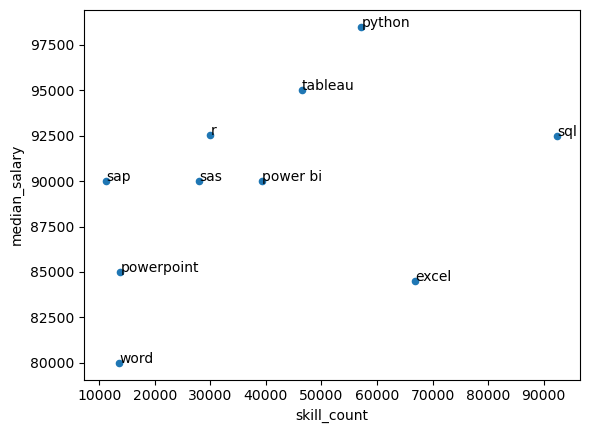

In [4]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

# plt.text 
# x-coordinate: Where to place the text horizontally. -> skill_stats['skill_count'].iloc[i]
# y-coordinate: Where to place the text vertically. -> skill_stats['median_salary'].iloc[i]
# text string: The actual text to display. -> txt


In [10]:
jobs_wfh_insurance = df.groupby('job_title_short').agg(
    average_salary=('salary_year_avg', 'median'),
    health_insurance=('job_health_insurance', 'count'),
    work_from_home=('job_work_from_home', 'count')
)

jobs_wfh_insurance_top3 = jobs_wfh_insurance.sort_values(by='health_insurance', ascending=False).head(3)

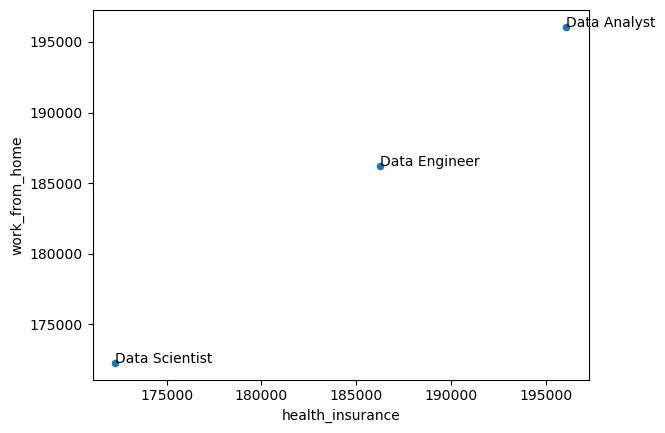

In [11]:
jobs_wfh_insurance_top3.plot(kind='scatter', x='health_insurance', y='work_from_home')

for i, txt in enumerate(jobs_wfh_insurance_top3.index):
    plt.text(jobs_wfh_insurance_top3['health_insurance'].iloc[i],
             jobs_wfh_insurance_top3['work_from_home'].iloc[i],
             txt)